In [1]:
label = ["p@5","p@10","p@15","p@20","r@5","r@10","r@15","r@20","g@5","g@10","g@15","g@20"]
best_evaluation_fairgan = [0.02954149805009365, 0.027553686872124672, 0.02621396817266941, 0.025039900094270706, 0.010226676240563393, 0.018203966319561005, 0.024836376309394836, 0.030917933210730553, 0.0316871777176857, 0.032173823565244675, 0.0332212820649147, 0.03436234965920448]
test_evaluation_fairgan = [0.028626278042793274, 0.02684941329061985, 0.0259416364133358, 0.02497432939708233, 0.009859872981905937, 0.017763188108801842, 0.024566324427723885, 0.03080032207071781, 0.030446240678429604, 0.0310794897377491, 0.03248598799109459, 0.033550381660461426]
best_evaluation_diffusion = [0.07661056297156171, 0.06703424260011547, 0.06395821242019735, 0.05986651189785197, 0.022481540156907898, 0.03827128270087791, 0.0565082654065507, 0.06784175165024633, 0.0828294097227395, 0.07856466868338689, 0.08075995868476904, 0.08177008960906992]
test_evaluation_diffusion = [0.03575159605339541, 0.03952408589669201, 0.03822789707873908, 0.038160185722576546, 0.01318181570210474, 0.02820307275862459, 0.040829476655847206, 0.05172756656639963, 0.03541468307862583, 0.04199422832356229, 0.04532993305923015, 0.04892493387903054]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(columns=label)
df.loc[0] = best_evaluation_fairgan
df.loc[1] = test_evaluation_fairgan
df.loc[2] = best_evaluation_diffusion
df.loc[3] = test_evaluation_diffusion
df.index = ["FairGAN - valid", "FairGAN", "DiffModel - valid", "Diffusion"]

In [3]:
df.reset_index(inplace=True)
df.rename(columns={"index":"model"},inplace=True)

In [4]:
df[["model","p@5","p@10","p@20","r@5","r@10","r@20","g@5","g@10","g@20"]]

,model,p@5,p@10,p@20,r@5,r@10,r@20,g@5,g@10,g@20
0,FairGAN - valid,0.029541,0.027554,0.025040,0.010227,0.018204,0.030918,0.031687,0.032174,0.034362
1,FairGAN,0.028626,0.026849,0.024974,0.009860,0.017763,0.030800,0.030446,0.031079,0.033550
2,DiffModel - valid,0.076611,0.067034,0.059867,0.022482,0.038271,0.067842,0.082829,0.078565,0.081770
3,Diffusion,0.035752,0.039524,0.038160,0.013182,0.028203,0.051728,0.035415,0.041994,0.048925


In [5]:
df_p_k = df[["model","p@5","p@10","p@15","p@20"]]
df_p_k = df_p_k.melt(id_vars=["model"],var_name="k",value_name="precision")
df_p_k["k"] = df_p_k["k"].str.replace("p@","").astype(int)

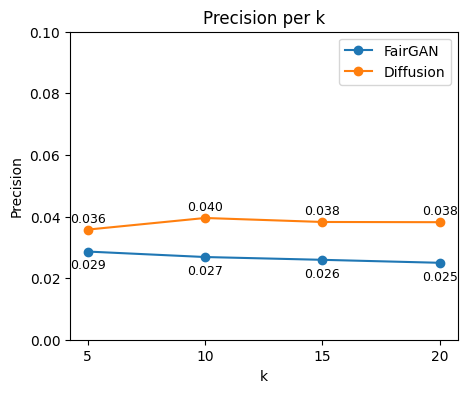

In [25]:
plt.figure(figsize=(5,4))

# Plot for FairGAN
plt.plot(df_p_k[df_p_k["model"]=="FairGAN"]["k"], df_p_k[df_p_k["model"]=="FairGAN"]["precision"], label="FairGAN", marker="o")
for i, row in df_p_k[df_p_k["model"]=="FairGAN"].iterrows():
    plt.text(row['k'], row['precision']-0.004, f'{row["precision"]:.3f}', fontsize=9, va='center_baseline',ha="center")

# Plot for Diffusion
plt.plot(df_p_k[df_p_k["model"]=="Diffusion"]["k"], df_p_k[df_p_k["model"]=="Diffusion"]["precision"], label="Diffusion", marker="o")
for i, row in df_p_k[df_p_k["model"]=="Diffusion"].iterrows():
    plt.text(row['k'], row['precision']+0.004, f'{row["precision"]:.3f}', fontsize=9, va="center_baseline",ha="center")

# Adjust plot
plt.ylim(0, 0.1)
plt.xlabel('k')
plt.ylabel('Precision')
plt.xticks([5, 10, 15, 20])
plt.legend()
plt.title('Precision per k')

plt.show()


In [27]:
df_r_k = df[["model","r@5","r@10","r@15","r@20"]]
df_r_k = df_r_k.melt(id_vars=["model"],var_name="k",value_name="recall")
df_r_k["k"] = df_r_k["k"].str.replace("r@","").astype(int)

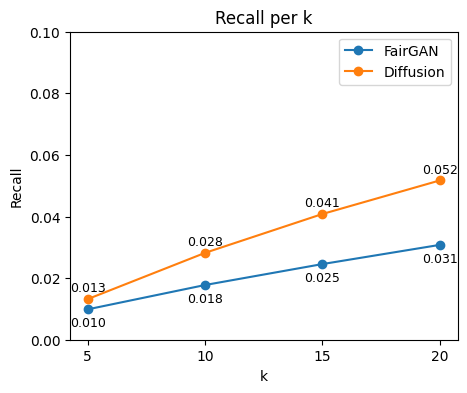

In [28]:

plt.figure(figsize=(5,4))

# Plot for FairGAN with annotations
plt.plot(df_r_k[df_r_k["model"]=="FairGAN"]["k"], df_r_k[df_r_k["model"]=="FairGAN"]["recall"], label="FairGAN", marker="o")
for i, row in df_r_k[df_r_k["model"]=="FairGAN"].iterrows():
    plt.text(row['k'], row['recall']-0.004, f'{row["recall"]:.3f}', fontsize=9, va='center_baseline',ha="center")

# Plot for Diffusion with annotations
plt.plot(df_r_k[df_r_k["model"]=="Diffusion"]["k"], df_r_k[df_r_k["model"]=="Diffusion"]["recall"], label="Diffusion", marker="o")
for i, row in df_r_k[df_r_k["model"]=="Diffusion"].iterrows():
    plt.text(row['k'], row['recall']+0.004, f'{row["recall"]:.3f}', fontsize=9,  va='center_baseline',ha="center")

# Adjust plot
plt.ylim(0, 0.1)
plt.xlabel('k')
plt.ylabel('Recall')
plt.xticks([5, 10, 15, 20])
plt.legend()
plt.title('Recall per k')

plt.show()


In [29]:
df_g_k = df[["model","g@5","g@10","g@15","g@20"]]
df_g_k = df_g_k.melt(id_vars=["model"],var_name="k",value_name="NDCG")
df_g_k["k"] = df_g_k["k"].str.replace("g@","").astype(int)

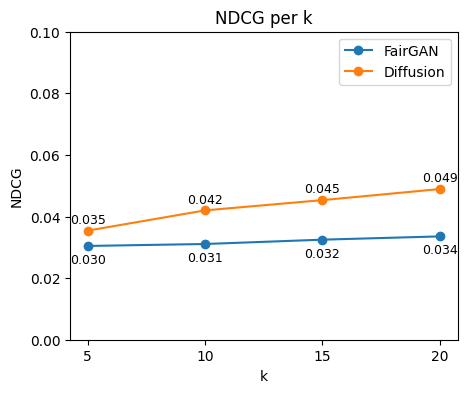

In [30]:
plt.figure(figsize=(5,4))

# Plot for FairGAN with annotations
plt.plot(df_g_k[df_g_k["model"]=="FairGAN"]["k"], df_g_k[df_g_k["model"]=="FairGAN"]["NDCG"], label="FairGAN", marker="o")
for i, row in df_g_k[df_g_k["model"]=="FairGAN"].iterrows():
    plt.text(row['k'], row['NDCG'] -0.004, f'{row["NDCG"]:.3f}', fontsize=9, va='center_baseline',ha="center")

# Plot for Diffusion with annotations
plt.plot(df_g_k[df_g_k["model"]=="Diffusion"]["k"], df_g_k[df_g_k["model"]=="Diffusion"]["NDCG"], label="Diffusion", marker="o")
for i, row in df_g_k[df_g_k["model"]=="Diffusion"].iterrows():
    plt.text(row['k'], row['NDCG'] +0.004, f'{row["NDCG"]:.3f}', fontsize=9, va='center_baseline',ha="center")

# Adjust plot
plt.ylim(0, 0.1)
plt.xlabel('k')
plt.ylabel('NDCG')
plt.xticks([5, 10, 15, 20])
plt.legend()
plt.title('NDCG per k')

plt.show()
